Install Library

In [11]:
%pip install pandas
%pip install plotly
%pip install matplotlib
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Import

In [12]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
import math

Read file

In [ ]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/Data/log_3.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [14]:
blocks = text.split('-------------')
print(blocks)
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for x in vis:
    print(x,end=" ")

['\n\n0.07,-9.19,0.45\n1.67,8.80,-3.97\n-87.20,-0.45\n\nRSSI : -10-----\n8.367742,100.044039\n10082600\n8\n15502\n1550\n105\n7\n\n28.81\n1008.77\n37.35\n53.72\n\n-3.31,-10.35,2.53\n-4.36,17.50,21.15\n-76.27,17.28\n\nRSSI : -99\n2025-05-27 17:08:28\n', '\n8.367742,100.044039\n10082800\n2\n15502\n1510\n105\n7\n\n28.80\n1008.71\n37.87\n53.72\n\n2.93,-9.61,-2.17\n-20.24,144.90,51.06\n-102.74,-16.55\n\nRSSI : -97\n2025-05-27 17:08:30\n', '\n8.367741,100.044042\n10083000\n14\n15502\n1510\n105\n7\n\n28.81\n1008.72\n37.75\n53.72\n\n-0.52,-6.96,1.07\n-46.46,80.04,26.98\n-81.27,4.24\n\nRSSI : -98\n2025-05-27 17:08:32\n', '\n8.367742,100.044041\n10083100\n14\n15502\n1530\n105\n7\n\n28.82\n1008.72\n37.76\n53.71\n\n1.05,-9.51,-3.11\n-9.53,210.27,-65.10\n-108.09,-6.00\n\nRSSI : -97\n2025-05-27 17:08:33\n', '\n8.367741,100.044042\n10083300\n20\n15502\n1510\n105\n7\n\n28.84\n1008.74\n37.60\n53.70\n\n4.18,-8.44,7.83\n51.52,239.63,-8.90\n-47.15,-19.93\n\nRSSI : -111\n2025-05-27 17:08:35\n', '\n8.367742,

Add Data

In [15]:
blocks = text.split('-------------')
sec = -1
b = -1
data = []
vis = []
listxt = ('S','R','I',' ','.',',','-','0','1','2','3','4','5','6','7','8','9','\n',':')

for block in blocks:
    b += 1
    ch = 1
    for s in block:
        if s not in listxt:
            ch = 0
            break
    vis.append(ch)
for block in blocks:
    sec += 1
    if not vis[sec]:
        data.append({
            'second': sec,
            'Time': float('nan'),
            'Latitude': float('nan'),
            'Longitude': float('nan'),
            'Speed': float('nan'),
            'Course': float('nan'),
            'Altitude_GPS': float('nan'),
            'HDOP': float('nan'),
            'Satellite': float('nan'),
            'Temp': float('nan'),
            'Pressure': float('nan'),
            'Altitude_BME280': float('nan'),
            'Humidity': float('nan'),
            'Acc_x': float('nan'),
            'Acc_y': float('nan'),
            'Acc_z': float('nan'),
            'Gyro_x': float('nan'),
            'Gyro_y': float('nan'),
            'Gyro_z': float('nan'),
            'Roll': float('nan'),
            'Pitch': float('nan'),
            'Tilted_x': float('nan'),
            'Tilted_y': float('nan'),
            'RSSI': float('nan')
        })
        continue
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    roll, pitch     = map(float, mag.split(','))
    mx = roll
    my = pitch
    if sec == 0:
        fmx = mx
        fmy = my
        mx = 0
        my = 0
    else:
        mx = abs(mx) - abs(fmx)
        my = abs(my) - abs(fmy)
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Roll': roll,
        'Pitch': pitch,
        'Tilted_x': mx,
        'Tilted_y': my,
        'RSSI': rssi
    })

ValueError: too many values to unpack (expected 2)

Data Fram

In [ ]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Roll,Pitch,Tilted_x,Tilted_y,RSSI
0,0,2025-05-27 14:20:57,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,32.96,1008.80,37.08,61.77,1.01,-11.93,-8.29,16.64,-7.47,6.46,-124.80,-3.99,0.00,0.00,-111.0
1,1,2025-05-27 14:20:59,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,32.99,1008.79,37.18,61.70,1.21,-9.62,1.31,-2.07,2.48,0.89,-82.22,-7.13,-42.58,3.14,-109.0
2,2,2025-05-27 14:21:01,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,33.03,1008.81,37.06,61.78,0.45,-9.76,0.29,2.30,-0.20,-1.70,-88.29,-2.65,-36.51,-1.34,-113.0
3,3,2025-05-27 14:21:02,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,33.08,1008.76,37.42,61.90,0.78,-9.62,0.54,-6.34,2.63,3.05,-86.81,-4.62,-37.99,0.63,-115.0
4,4,2025-05-27 14:21:04,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,33.15,1008.78,37.26,61.22,6.51,-7.26,2.05,-40.13,58.34,-48.27,-74.21,-40.82,-50.59,36.83,-107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,2025-05-27 14:31:57,8.368082,100.043988,158.0,0.0,2000.0,9999.0,0.0,33.42,1008.41,40.40,55.85,1.12,-9.94,1.84,2.82,-56.95,82.59,-79.51,-6.34,-45.29,2.35,-73.0
388,388,2025-05-27 14:31:59,8.368098,100.043975,86.0,0.0,2020.0,407.0,3.0,33.42,1008.28,41.44,55.84,-0.73,-10.35,-0.52,-8.35,124.80,-3.10,-92.87,4.02,-31.93,0.03,-64.0
389,389,2025-05-27 14:32:01,8.368098,100.043975,86.0,0.0,2020.0,9999.0,0.0,33.41,1008.21,42.05,55.81,-1.78,-11.78,2.49,-13.91,-6.79,-29.17,-78.04,8.39,-46.76,4.40,-64.0
390,390,2025-05-27 14:32:03,8.368084,100.043996,100.0,0.0,1960.0,241.0,5.0,33.41,1008.16,42.48,55.78,2.32,-7.72,0.94,15.55,22.90,46.36,-83.07,-16.58,-41.73,12.59,-64.0


Plot graph

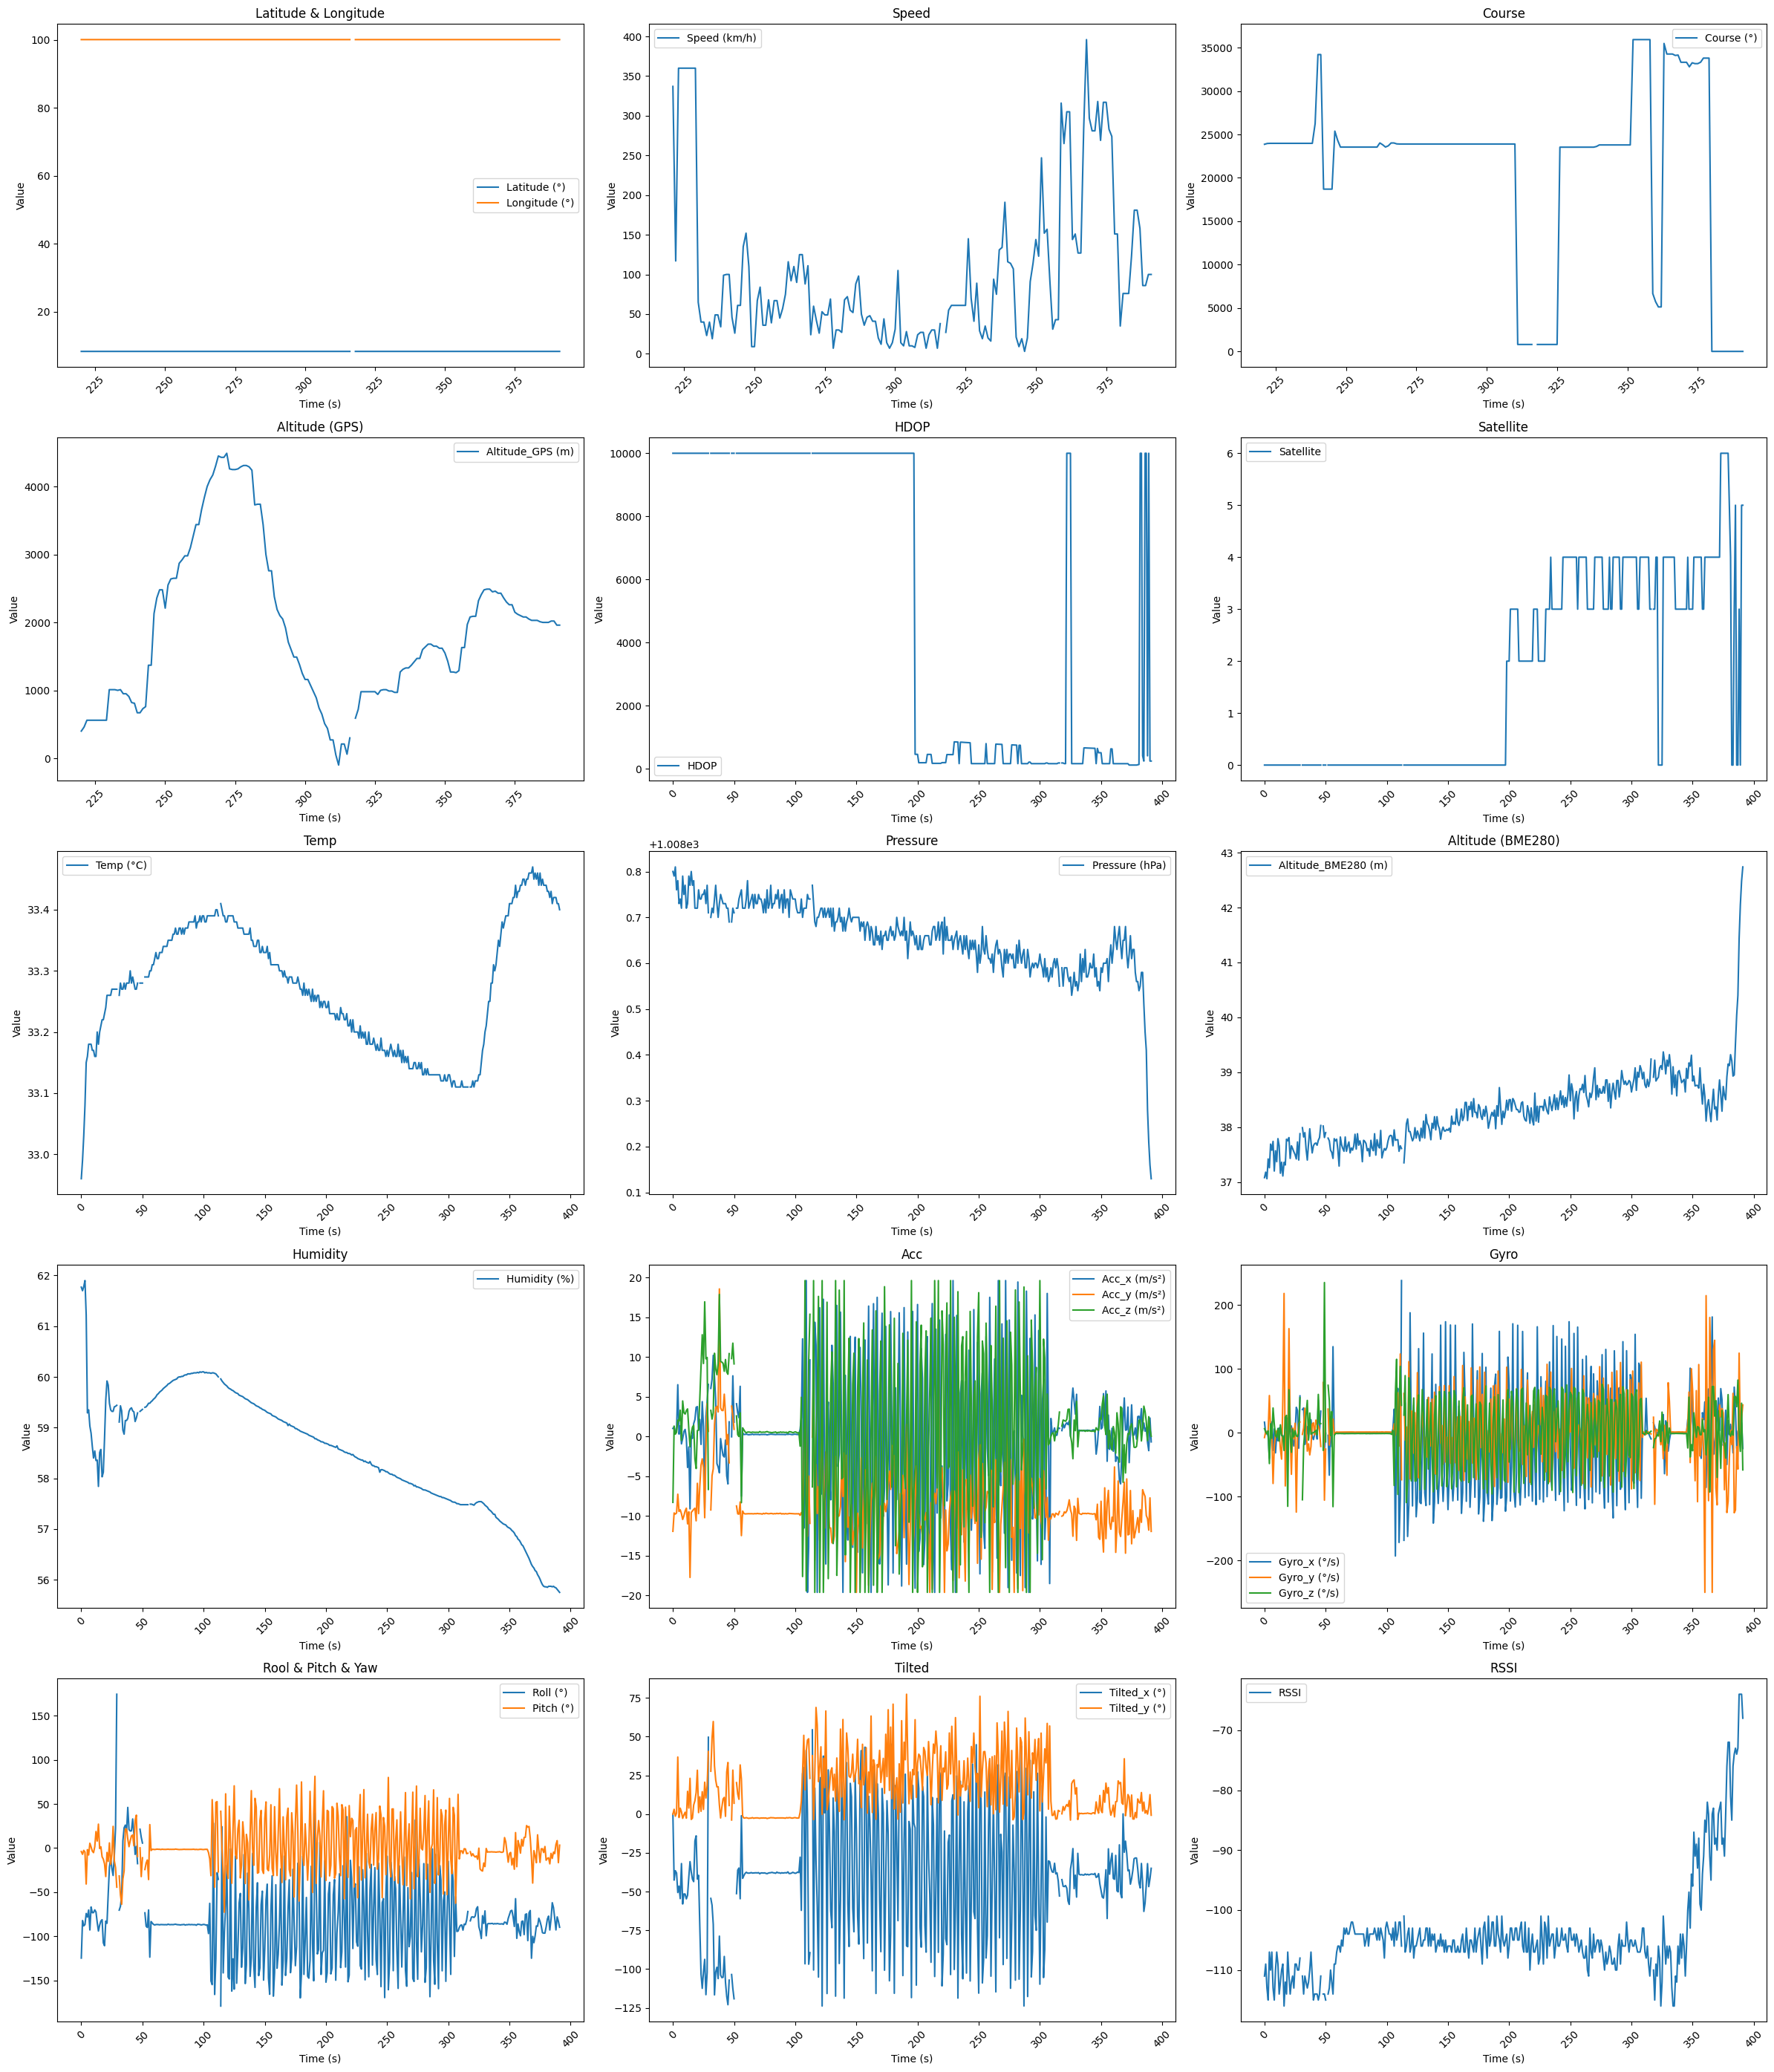

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3,figsize=(24, 28))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15 = axes.flatten()

# Latitude & Longitude
ax1.plot(df['second'], df['Latitude'], label='Latitude (°)')
ax1.plot(df['second'], df['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(df['second'], df['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(df['second'], df['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# HDOP	
ax5.plot(df['second'], df['HDOP'], label='HDOP')
ax5.set_title('HDOP')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Value')
ax5.legend()

# Satellite
ax6.plot(df['second'], df['Satellite'], label='Satellite')
ax6.set_title('Satellite')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Value')
ax6.legend()

# Temp
ax7.plot(df['second'], df['Temp'], label='Temp (°C)')
ax7.set_title('Temp')
ax7.set_xlabel('Time (s)')
ax7.set_ylabel('Value')
ax7.legend()

# Pressure
ax8.plot(df['second'], df['Pressure'], label='Pressure (hPa)')
ax8.set_title('Pressure')
ax8.set_xlabel('Time (s)')
ax8.set_ylabel('Value')
ax8.legend()

# Altitude_BME280
ax9.plot(df['second'], df['Altitude_BME280'], label='Altitude_BME280 (m)')
ax9.set_title('Altitude (BME280)')
ax9.set_xlabel('Time (s)')
ax9.set_ylabel('Value')
ax9.legend()

# Humidity
ax10.plot(df['second'], df['Humidity'], label='Humidity (%)')
ax10.set_title('Humidity')
ax10.set_xlabel('Time (s)')
ax10.set_ylabel('Value')
ax10.legend()

# Acc
ax11.plot(df['second'], df['Acc_x'], label='Acc_x (m/s²)')
ax11.plot(df['second'], df['Acc_y'], label='Acc_y (m/s²)')
ax11.plot(df['second'], df['Acc_z'], label='Acc_z (m/s²)')
ax11.set_title('Acc')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Value')
ax11.legend()

# Gyro
ax12.plot(df['second'], df['Gyro_x'], label='Gyro_x (°/s)')
ax12.plot(df['second'], df['Gyro_y'], label='Gyro_y (°/s)')
ax12.plot(df['second'], df['Gyro_z'], label='Gyro_z (°/s)')
ax12.set_title('Gyro')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('Value')
ax12.legend()

# Roll Pitch Yaw
ax13.plot(df['second'], df['Roll'], label='Roll (°)')
ax13.plot(df['second'], df['Pitch'], label='Pitch (°)')
ax13.set_title('Rool & Pitch & Yaw')
ax13.set_xlabel('Time (s)')
ax13.set_ylabel('Value')
ax13.legend()

# Tilted
ax14.plot(df['second'], df['Tilted_x'], label='Tilted_x (°)')
ax14.plot(df['second'], df['Tilted_y'], label='Tilted_y (°)')
ax14.set_title('Tilted')
ax14.set_xlabel('Time (s)')
ax14.set_ylabel('Value')
ax14.legend()

# RSSI
ax15.plot(df['second'], df['RSSI'], label='RSSI')
ax15.set_title('RSSI')
ax15.set_xlabel('Time (s)')
ax15.set_ylabel('Value')
ax15.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


Map

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="second",
    zoom=12,
    height=600,
    mapbox_style="open-street-map"
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


/tmp/ipykernel_198626/3317165664.py:1: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(
